# 5.1.1 합성곱층의 필요성

- 그림 5-1 

Flatten 자체가 공간 구조를 완전히 보존하지 않기 때문에, 이를 보완하려면 flatten 전에 충분한 합성곱과 풀링으로 특징을 추출

소프트맥스 함수를 사용하는 이유? by데이널, 2024.1.16, https://bommbom.tistory.com/entry/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4-%ED%95%A8%EC%88%98%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94-%EC%9D%B4%EC%9C%A0

[ML] 활성화 함수(Activation Function) 종류 정리, heeee__ya  2021. 9. 29., https://heeya-stupidbutstudying.tistory.com/entry/ML-%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98Activation-Function#google_vignette

인공 신경망 학습 원리와 기울기 소실 문제 정의 및 해결법 한 ..., by 모두의 케빈, 2022.10.13, https://kevinitcoding.tistory.com/entry/%EA%B0%9C%EB%85%90%EC%A0%81-%EC%A0%91%EA%B7%BC-%EC%9D%B8%EA%B3%B5-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98-%ED%95%99%EC%8A%B5%EA%B2%BD%EC%82%AC-%ED%95%98%EA%B0%95%EB%B2%95%EA%B3%BC-%EA%B8%B0%EC%9A%B8%EA%B8%B0-%EC%86%8C%EC%8B%A4-%EB%AC%B8%EC%A0%9CVanishing-Gradient-Problem-%EC%99%84%EB%B2%BD

기울기 소실 문제: 교재 151/4장

1. **역전파(backpropagation)**란?
신경망 학습의 핵심 알고리즘입니다.

비용함수(loss function)가 최소가 되도록 가중치를 조정하기 위해, **기울기(gradient)**를 각 층에 대해 계산하는 과정입니다.

이때 사용하는 수학 도구가 연쇄법칙(chain rule).



Loss = f(y_actual, y_pred)
         ↑
y_pred = g(x; W)    ← 여러 층의 합성 함수


→ 이 Loss에 대해 W들의 기울기인 ∂Loss/∂W 를 계산하여,
W를 더 나은 방향으로 업데이트합니다.

 기울기 소멸 문제란?
기울기를 계산할 때, 각 층에서 생긴 미분값(특히 활성화 함수의 미분)이 계속 곱해지게 됩니다.

그런데 이 편미분 값들이 0에 가까운 값일 경우,
여러 층을 거칠수록 기울기가 지수적으로 작아져서 거의 0이 됩니다.
 d Loss/d W1 = dLoss/dh3 * dh3/dh2 * dh2/dh1 * dh1/dW1
​
 
→ 앞쪽 층(입력에 가까운 층)은 업데이트가 거의 안 됩니다.
→ 학습이 느려지거나 멈춥니다.

“역전파는 예측 오차를 줄이기 위한 비용함수의 기울기를 계산하여, 이를 각 층으로 역으로 전파하면서 가중치를 업데이트하는 과정이다.”

그런데 이 과정에서 기울기를 계산할 때 계속 곱해지는 미분값들이 작으면, 앞쪽 층까지 기울기가 거의 전달되지 못하는 문제가 ‘기울기 소멸’이다.



기울기 소멸(Vanishing Gradient) 현상이 주로 발생하는 이유는 **시그모이드(sigmoid)**나 tanh와 같은 전통적인 활성화 함수의 특성 때문

기울기 소멸의 근본 원인은 시그모이드와 tanh처럼 미분값이 0에 가까운 활성화 함수 사용 때문.

이런 함수들을 깊은 층에 사용하면, 역전파 중 연쇄법칙으로 곱해지는 미분값이 너무 작아져서 학습이 어렵다.

역전파에서 "계속 곱해지는 구조"란?
신경망은 여러 층으로 구성되어 있고, 각 층에서는 활성화 함수(예: 시그모이드)를 거칩니다.

역전파는 각 층을 거꾸로 지나면서 미분값을 계속 곱합니다:

- 전체 기울기 = 마지막 층의 미분 × 이전 층의 미분 × 그 전 층의 미분 × ...

왜 미분을 곱하나? – "연쇄법칙(Chain Rule)" 때문!
🔸 예시: 함수가 함수 안에 있는 구조

입력 x → 은닉층 h → 출력 ŷ

은닉층: h = f(x)

출력층: ŷ = g(h) = g(f(x))

즉, 전체는 합성함수입니다:

ŷ = g(f(x))

오차(비용함수, loss) L을 줄이기 위해
입력층 근처의 어떤 가중치 w를 어떻게 바꿔야 할지, 즉
∂L/∂w (L을 w로 미분한 값) 을 구하고 싶습니다.

미분의 연쇄법칙은 다음과 같은 규칙입니다:

🎯 L = g(f(w)) 라면
dL/dw = (dg/df) × (df/dw)

∂L/∂w = ∂L/∂z₃ × ∂z₃/∂z₂ × ∂z₂/∂z₁ × ∂z₁/∂w

마지막 오차에서부터 시작해서, 각 층의 미분값을 곱해가며 역방향으로 계산해야 합니다.



목적: 오차를 줄이기 위해 각 가중치가 얼마나 오차에 영향을 줬는지 파악해야 합니다.

그래야 어떤 방향으로, 얼마나 가중치를 조정할지 알 수 있습니다.

이때 쓰는 것이 바로 **기울기(gradient)**이고,

그걸 구하는 수단이 연쇄법칙을 이용한 역전파입니다.


딥러닝에서 각 가중치가 오차에 끼친 영향을 구하기 위해 역전파 사용

역전파는 연쇄법칙에 따라, 각 층의 미분값을 곱해가며 오차를 전파

층이 많을수록 작은 수끼리 계속 곱해져서 기울기가 0에 가까워지는 문제가 → 기울기 소실


# 5.1.3 1D,2D,3D 합성곱

- 1D 합성곱 : 입력이 어떤 시계열 데이터거나 그래프 곡선이라고 할 때, 1D 합성곱은 해당 위치를 중심으로 이웃 값과 평균을 내는 것과 비슷한 효과

입력 신호:      [3, 5, 2, 8, 6, 1, 4]
필터(커널):      [1, 0, -1]      ← 예시 (edge 검출 필터)

→ 이 커널을 입력 위를 이동시키며 곱하고 더하는 방식


커널: [1/3, 1/3, 1/3] ← moving average 필터


"곡선을 완화한다" = 노이즈 제거 + 부드럽게 만든다

1D 합성곱은 입력의 국소적인 평균 또는 특징을 추출하는 방식으로 작동

주로 moving average와 비슷한 커널을 사용할 때 곡선이 완화됨

"3D 입력을 갖는 2D 합성곱에서 필터의 깊이(depth)가 입력 채널 수와 같아야 한다
왜 깊이(채널 수)가 같아야 하나?
합성곱 계산 예시:
입력이 
(3,32,32)이라면 (예: RGB 이미지)

필터는 
(3,3,3)이어야 합니다.
→ 이때 필터 하나가 3개의 2D 필터(채널별 커널)를 가지고 있어야 각각 곱셈을 하고, 합칠 수 있음.
채널별로 곱한 후 합쳐서 한 개의 출력값을 만듬 

입력 이미지:
tensor([[1., 2., 3., 0., 1., 2.],
        [4., 5., 6., 1., 2., 3.],
        [7., 8., 9., 0., 1., 2.],
        [2., 3., 4., 5., 6., 7.],
        [6., 5., 4., 3., 2., 1.],
        [1., 0., 1., 2., 3., 4.]])

커널 (3x3):
tensor([[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]], grad_fn=<SelectBackward0>)

출력 특성 맵:
tensor([[-6., 14., 14., -6.],
        [-6., 10., 10., -6.],
        [-2.,  8.,  8., -2.],
        [ 0., -2., -2., -2.]], grad_fn=<SqueezeBackward1>)


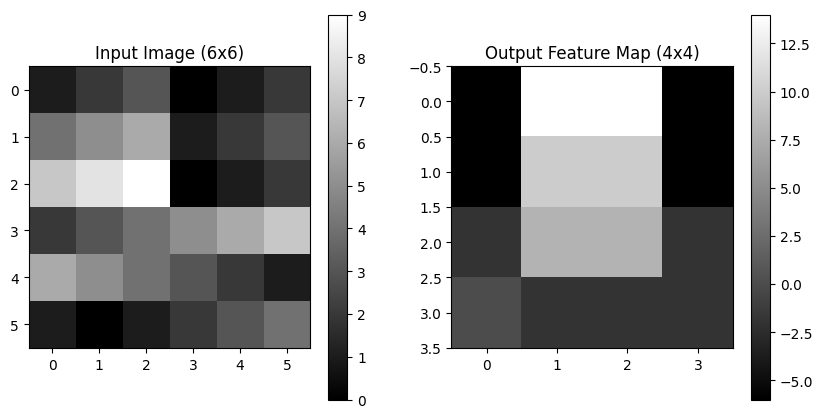

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. 입력 이미지 데이터 정의 (6x6)
input_image = torch.tensor([
    [1, 2, 3, 0, 1, 2],
    [4, 5, 6, 1, 2, 3],
    [7, 8, 9, 0, 1, 2],
    [2, 3, 4, 5, 6, 7],
    [6, 5, 4, 3, 2, 1],
    [1, 0, 1, 2, 3, 4]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (Batch=1, Channel=1, Height=6, Width=6)
# unsqueeze(0)은 텐서에 배치 차원과 채널 차원을 추가하기 위해 사용됩니다. 
## squeeze 뜻: 짜내다 압축하다 
# 이는 Conv2d 레이어와 같은 PyTorch 연산이 요구하는 입력 형식(4D 텐서)을 맞추기 위한 필수적인 작업입니다.


# 2. 커널 (3x3 필터) 정의
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, bias=False)

# 커널을 수동으로 설정 (예: 가장자리를 강조하는 필터)
with torch.no_grad():
    conv_layer.weight[0, 0] = torch.tensor([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ])

# 3. 합성곱 연산 수행
output_feature_map = conv_layer(input_image)

# 4. 결과 행렬 출력
print("입력 이미지:")
print(input_image.squeeze(0).squeeze(0))  # 원래 6x6 입력 이미지
# **squeeze(0)**은 PyTorch에서 크기가 1인 차원을 제거

print("\n커널 (3x3):")
print(conv_layer.weight[0, 0])  # 커널 값 출력

print("\n출력 특성 맵:")
print(output_feature_map.squeeze(0).squeeze(0))  # 4x4 출력 특성 맵

# 5. 결과 이미지 시각화
plt.figure(figsize=(10, 5))

# 입력 이미지
plt.subplot(1, 2, 1)
plt.title("Input Image (6x6)")
plt.imshow(input_image.squeeze(0).squeeze(0), cmap="gray")
plt.colorbar()

# 출력 특성 맵
plt.subplot(1, 2, 2)
plt.title("Output Feature Map (4x4)")
plt.imshow(output_feature_map.squeeze(0).squeeze(0).detach().numpy(), cmap="gray")
plt.colorbar()

plt.show()

# 풀링층 

입력 이미지:
tensor([[1., 2., 3., 0., 1., 2., 3., 4.],
        [4., 5., 6., 1., 2., 3., 4., 5.],
        [7., 8., 9., 0., 1., 2., 3., 4.],
        [2., 3., 4., 5., 6., 7., 8., 9.],
        [6., 5., 4., 3., 2., 1., 0., 1.],
        [1., 0., 1., 2., 3., 4., 5., 6.],
        [4., 3., 2., 1., 0., 1., 2., 3.],
        [7., 8., 9., 8., 7., 6., 5., 4.]])

Max Pooling 결과 (4x4):
tensor([[9., 9.],
        [9., 7.]])

Average Pooling 결과 (4x4):
tensor([[3.7500, 4.0000],
        [4.0000, 3.1250]])


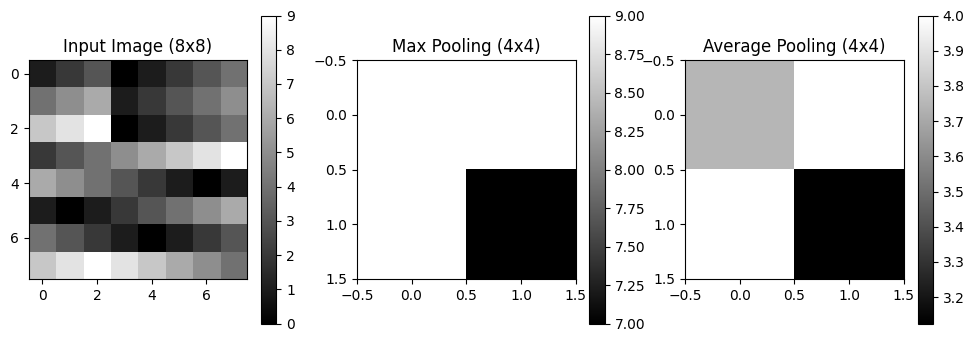

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. 입력 이미지 데이터 정의 (8x8)
input_image = torch.tensor([
    [1, 2, 3, 0, 1, 2, 3, 4],
    [4, 5, 6, 1, 2, 3, 4, 5],
    [7, 8, 9, 0, 1, 2, 3, 4],
    [2, 3, 4, 5, 6, 7, 8, 9],
    [6, 5, 4, 3, 2, 1, 0, 1],
    [1, 0, 1, 2, 3, 4, 5, 6],
    [4, 3, 2, 1, 0, 1, 2, 3],
    [7, 8, 9, 8, 7, 6, 5, 4]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (Batch=1, Channel=1, Height=8, Width=8)

# 2. Max Pooling과 Average Pooling 정의
max_pool = nn.MaxPool2d(kernel_size=4, stride=4)
avg_pool = nn.AvgPool2d(kernel_size=4, stride=4)

# 3. 풀링 수행
output_max_pool = max_pool(input_image)
output_avg_pool = avg_pool(input_image)

# 4. 결과 행렬 출력
print("입력 이미지:")
print(input_image.squeeze(0).squeeze(0))  # 원래 8x8 입력 이미지

print("\nMax Pooling 결과 (4x4):")
print(output_max_pool.squeeze(0).squeeze(0))  # Max Pooling 결과

print("\nAverage Pooling 결과 (4x4):")
print(output_avg_pool.squeeze(0).squeeze(0))  # Average Pooling 결과

# 5. 결과 이미지 시각화
plt.figure(figsize=(12, 4))

# 입력 이미지
plt.subplot(1, 3, 1)
plt.title("Input Image (8x8)")
plt.imshow(input_image.squeeze(0).squeeze(0), cmap="gray")
plt.colorbar()

# Max Pooling 결과
plt.subplot(1, 3, 2)
plt.title("Max Pooling (4x4)")
plt.imshow(output_max_pool.squeeze(0).squeeze(0).detach().numpy(), cmap="gray")
plt.colorbar()

# Average Pooling 결과
plt.subplot(1, 3, 3)
plt.title("Average Pooling (4x4)")
plt.imshow(output_avg_pool.squeeze(0).squeeze(0).detach().numpy(), cmap="gray")
plt.colorbar()

plt.show()


합성곱 신경망 구조

CNN(Convolutional Neural Network)에서 **DNN(Deep Neural Network)**의 완전 연결층(Fully Connected Layer)은 Linear 계층의 모든 뉴런들이 서로 연결된 것을 의미

모든 뉴런이 연결됨:

완전 연결층에서는 이전 계층의 모든 뉴런이 현재 계층의 모든 뉴런에 연결됩니다. 이는 Dense Layer(밀집 계층)라고도 부르며, 신경망 구조에서 가장 기본적인 계층 유형입니다.

Fully Connected Layer와 Linear Layer 차이:

Fully Connected Layer는 보통 활성화 함수(e.g., ReLU, Softmax)와 함께 사용됩니다.
Linear Layer는 활성화 함수를 적용하지 않은 순수한 선형 변환을 의미합니다.

#소프트맥스

 CNN 모델이 이미지(손글씨 숫자 이미지)를 입력받아, 숫자 
0,1,2,…,9 중 하나로 분류하는 작업을 수행한다고 가정해봅시다. 마지막 Fully Connected Layer의 출력은 각 클래스에 해당하는 점수(로짓, logits)

Softmax 함수는 다음과 같이 정의됩니다: P(y = i|z) = exp(zi)/ sum(exp(zj)) where j = 1 to C(C:클래스 갯수, zi는 클래스 i에 해당하는 logits /점수 값)

Softmax 출력은 각 클래스의 확률 분포입니다. 여기서 가장 높은 확률을 가지는 클래스 
i=4가 최종 예측 결과

입력 데이터 크기: torch.Size([1, 3, 5, 5])
커널 크기: torch.Size([1, 3, 3, 3])
출력 데이터 크기: torch.Size([1, 1, 5, 5])


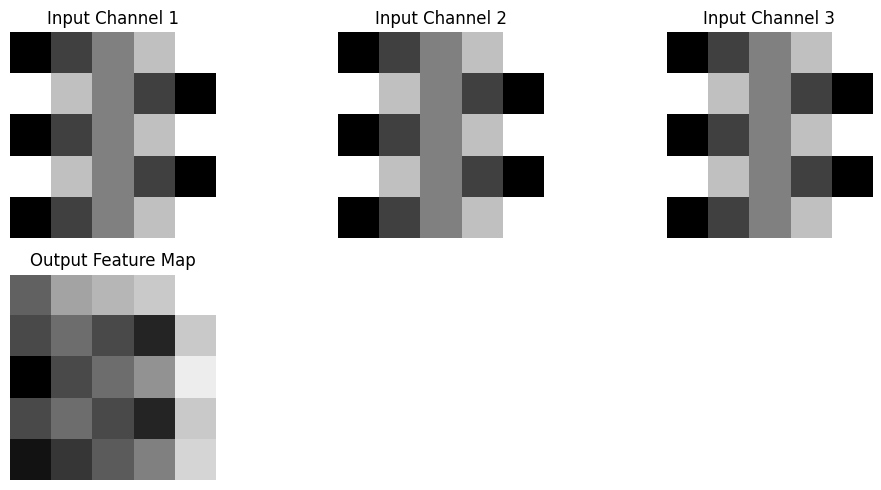

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. 입력 데이터 생성 (3D 입력: 3채널, 5x5 이미지)
input_data = torch.tensor([
    [[1, 2, 3, 4, 5],  # 채널 1
     [5, 4, 3, 2, 1],
     [1, 2, 3, 4, 5],
     [5, 4, 3, 2, 1],
     [1, 2, 3, 4, 5]],

    [[2, 3, 4, 5, 6],  # 채널 2
     [6, 5, 4, 3, 2],
     [2, 3, 4, 5, 6],
     [6, 5, 4, 3, 2],
     [2, 3, 4, 5, 6]],

    [[3, 4, 5, 6, 7],  # 채널 3
     [7, 6, 5, 4, 3],
     [3, 4, 5, 6, 7],
     [7, 6, 5, 4, 3],
     [3, 4, 5, 6, 7]]
], dtype=torch.float32).unsqueeze(0)  # Batch 차원 추가

print("입력 데이터 크기:", input_data.shape)  # [1, 3, 5, 5] = Batch=1, Channels=3, Height=5, Width=5

# 2. 2D 합성곱 정의
conv2d = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1, bias=False)

# 3. 커널 초기화 (3채널의 필터 설정)
# 3. 커널 초기화 (3채널의 필터 설정)
with torch.no_grad():
    conv2d.weight = nn.Parameter(torch.tensor([
        [[1, 0, -1], [1, 0, -1], [1, 0, -1]],  # 채널 1 필터
        [[0, 1, -1], [0, 1, -1], [0, 1, -1]],  # 채널 2 필터
        [[-1, -1, -1], [1, 1, 1], [0, 0, 0]]   # 채널 3 필터
    ], dtype=torch.float32).unsqueeze(0))  # Output Channel 차원 추가

print("커널 크기:", conv2d.weight.shape)  # [1, 3, 3, 3] = OutputChannel=1, InputChannels=3, Kernel=3x3

# 4. 합성곱 수행
output_data = conv2d(input_data)

print("출력 데이터 크기:", output_data.shape)  # [1, 1, 5, 5]

# 5. 결과 시각화
plt.figure(figsize=(10, 5))

# 입력 데이터 채널별 시각화
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.title(f"Input Channel {i+1}")
    plt.imshow(input_data[0, i].detach().numpy(), cmap="gray")
    plt.axis("off")

# 출력 결과 시각화
plt.subplot(2, 3, 4)
plt.title("Output Feature Map")
plt.imshow(output_data[0, 0].detach().numpy(), cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


1x1 합성곱: 교재 179페이지

1×1 필터는 입력 채널 
𝑙의 모든 정보를 축약해 하나의 값으로 변환합니다. 이 과정은 입력의 공간적 크기(
w,h)에는 영향을 주지 않으며, 채널 정보를 압축하여 새로운 특성을 생성합니다.

1×1 필터는 입력의 공간적 크기 
(w,h)를 유지하면서 채널 
𝑙를 압축해 새로운 출력값을 생성합니다.
출력 크기가 (w,h)가 되는 이유는 필터의 크기와 컨볼루션 연산의 구조적 특성 때문입니다. 
1×1 필터는 입력 텐서의 공간적인 정보에는 영향을 주지 않기 때문입니다.

In [15]:
# 5.2 합성곱 신경망 맛보기

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
device

device(type='cpu')

In [19]:
# FashionMNIST는 10개의 의류 종류를 포함한 흑백 이미지 데이터셋입니다. 각 이미지 크기는 28x28 픽셀
train_dataset  = torchvision.datasets.FashionMNIST("../chap05/data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_dataset  = torchvision.datasets.FashionMNIST("../chap05/data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()])) 

In [20]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=100)

img = train_dataset[img_xy][0][0, :, :]

1. train_dataset[img_xy]:

train_dataset에서 img_xy라는 인덱스에 해당하는 데이터를 가져옵니다.

FashionMNIST의 각 항목은 (image, label) 형태의 튜플로 반환됩니다.
image: 28x28 크기의 이미지 데이터 (Tensor 형태).
label: 이미지에 해당하는 클래스 레이블입니다.

2. [0]:

튜플 (image, label)에서 첫 번째 요소인 이미지만 가져옵니다.

3. [0, :, :]:

FashionMNIST 데이터셋의 이미지는 1채널 (흑백) 이미지로, 텐서의 형태는 [1, 28, 28]입니다.
[0, :, :]는 첫 번째 채널의 28x28 이미지 데이터를 가져옵니다.
결과적으로 img는 2D Tensor (28x28) 형태가 됩니다.

1. train_dataset의 구조
train_dataset은 torchvision.datasets.FashionMNIST 클래스를 사용해 만들어진 데이터셋입니다.

각 데이터셋 요소: train_dataset[index]는 튜플 (image, label)입니다.
image: 3차원 텐서 형태로 제공됩니다.

Shape: [1, 28, 28]
1: 채널 수 (흑백 이미지이므로 1채널)
28: 이미지의 높이 (Height)
28: 이미지의 너비 (Width)


label: 해당 이미지의 정수형 레이블 값 (0 ~ 9 사이의 클래스).

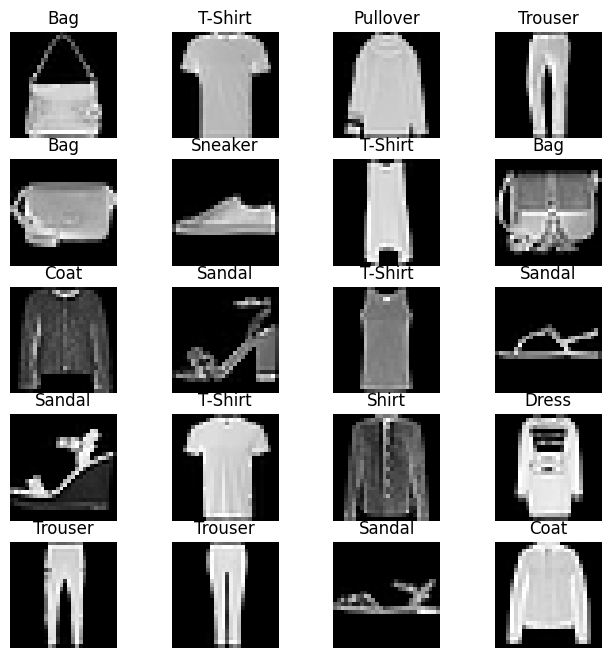

In [21]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:] #데이터세트의 구성을 이해하는 것이 필요 
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

nn.Module의 call 메서드

Python의 객체는 __call__() 메서드를 오버라이딩하면 객체를 함수처럼 호출할 수 있습니다.

PyTorch의 nn.Module 클래스는 __call__() 메서드를 오버라이딩하여 사용자가 정의한 forward()를 호출하도록 합니다.

import torch

class Module:
    def __call__(self, *input, **kwargs):
        # forward()를 호출하기 전에 여러 내부 작업 수행
        result = self.forward(*input, **kwargs)
        return result

    def forward(self, *input):
        raise NotImplementedError("Forward method not implemented")


메서드의 이름: forward

이 메서드는 추상 메서드처럼 작동합니다.

딥러닝 라이브러리 (예: PyTorch)에서 자주 등장하며, 신경망 계층에서 **순전파 연산(Forward Pass)**를 구현하는 데 사용됩니다.

이 메서드는 클래스를 상속받는 하위 클래스에서 반드시 오버라이드(재정의) 되어야 합니다.

 raise NotImplementedError

NotImplementedError는 Python 내장 예외로, 메서드가 구현되지 않았음을 나타냅니다.

이 코드는 현재 클래스에서 forward 메서드가 정의되지 않았고, 사용자가 이를 직접 구현해야 한다는 신호를 제공합니다.

메시지 "Forward method not implemented"가 예외 메시지로 출력됩니다.

In [22]:
output = model(input)


NameError: name 'model' is not defined

In [ ]:
output = model.__call__(input)


In [ ]:
output = model.forward(input)


언제 호출되나?
당신이 모델 인스턴스를 함수처럼 사용할 때 호출

In [ ]:
model = MyNet()  # MyNet은 nn.Module 상속 클래스
output = model(x)  # 이 시점에서 __call__()이 자동 호출됨


__call__()은 model(input)처럼 모델 인스턴스를 함수처럼 쓸 때 자동으로 호출

내부적으로 forward()를 호출하며, 그 외에도 hook 등 중요한 작업을 함께 처리

따라서 model.forward(x)는 쓰지 말고 항상 model(x) 를 사용해야 안전하고 일관됨

In [ ]:
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN,self).__init__()
        self.fc1 = nn.Linear(in_features=784,out_features=256)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=256,out_features=128)
        self.fc3 = nn.Linear(in_features=128,out_features=10)

    def forward(self,input_data):
        #PyTorch의 view() 메서드는 텐서의 **형상(Shape)**을 변경하는 기능을 수행합니다. 
        # 이는 기존 텐서의 데이터를 재배열하거나 복사하지 않고, 메모리 상에서 형태만 바꾸는 연산입니다.
        # -1: 첫 번째 차원(Batch)은 PyTorch가 자동으로 계산하도록 설정합니다
        # 입력 텐서 [Batch, 1, 28, 28]은 2차원 텐서 [Batch, 784]로 변환됩니다.
        # 첫 번째 차원은 Batch 크기에 따라 자동 계산됩니다.
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [ ]:
# 코드 5-7 심층 신경망에서 필요한 파라미터 정의
learning_rate = 0.001;
model = FashionDNN();
model.to(device)

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# 코드 5-8 심층 신경망을 이용한 모델 학습
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28)) # images는 원래 미니배치 형태의 이미지 데이터
        # 입력 이미지를 (100,1,28,28)로 재구성:
        # 100: 미니배치 크기 (한 번에 학습에 사용되는 샘플 개수)
        # 1: 채널 수 (예: 흑백 이미지)
        # 28,28: 이미지의 높이와 너비
        labels = Variable(labels)
        # Variable은 PyTorch에서 **자동 미분(Autograd)**을 지원하기 위해 사용되었던 래퍼(wrapper) 클래스
        # images를 계산 그래프에 포함시키고, 
        # 역전파(Backpropagation) 중 이 값을 기반으로 기울기(gradient)를 계산
        outputs = model(train) 
        loss = criterion(outputs, labels)# 모델의 출력값과 실제 정답 레이블을 비교하여 **손실(loss)**을 계산
        ##이 값을 통해 모델이 예측을 얼마나 잘못했는지 평가합니다.
        ## criterion: 손실 함수(loss function)
        optimizer.zero_grad() # 역전파를 수행하기 전에, 모델의 모든 **기울기(gradients)**를 초기화
        loss.backward() # **역전파(backpropagation)**를 수행하여, 손실(loss)값에 대한 모델 파라미터들의 **기울기(gradient)**를 계산
        optimizer.step() #기울기를 기반으로 모델의 가중치(weight)를 업데이트
        count += 1
    
        if not (count % 50):    
            total = 0
            correct = 0        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)            
                test = Variable(images.view(100, 1, 28, 28))            
                outputs = model(test)            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\torch\nn\functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.6169204115867615, Accuracy: 83.66000366210938%
Iteration: 1000, Loss: 0.4420689344406128, Accuracy: 84.91000366210938%
Iteration: 1500, Loss: 0.325044721364975, Accuracy: 84.54000091552734%
Iteration: 2000, Loss: 0.414847731590271, Accuracy: 85.36000061035156%
Iteration: 2500, Loss: 0.25187602639198303, Accuracy: 86.33999633789062%
Iteration: 3000, Loss: 0.3196975886821747, Accuracy: 86.76000213623047%


교재 193페이지 합성곱 네트워크 생성 

In [ ]:
#코드 5-9 합성곱 네트워크 생성
class FashionCNN(nn.Module):    
    def __init__(self):
        super(FashionCNN, self).__init__()        
        self.layer1 = nn.Sequential( #순차적 연결: 계층들이 정의된 순서대로 데이터가 흐릅니다.
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1), # 출력높이 = 28 
            ## (1,28,28) -> (32,28,28)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # 출력 높이 = 14
            ## (32,28,28) -> (32,14,14)
        )       
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 출력높이 = 12
            ##(32,14,14) -> (64,12,12)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2) # 출력높이 = 6
            ## (64,12,12) -> (64,6,6) =>> in_features = 64*6*6
        )        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600) ## 매개변수 값을 지정하는 방법을 알아야
        # in_features는 Fully Connected Layer로 입력되는 1차원 벡터의 크기를 의미합니다. 
        # 이 값을 계산하려면 CNN의 마지막 Convolutional Layer 또는 Pooling Layer의 출력 텐서 크기를 알아야 합니다.
        
        # out_features는 Fully Connected Layer의 출력 노드 수를 지정합니다.
        # 이 값은 설계자가 결정하며, 주로 다음을 고려합니다:
        ## 신경망의 중간 노드 수: 예를 들어, 
        ## 600처럼 적절한 크기를 설정.
        ## 문제의 복잡성: 큰 네트워크일수록 더 많은 노드 필요.
        ## 출력 클래스 수: 최종 출력 레이어는 클래스 개수와 동일한 크기를 가져야 합니다.
        
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) # 배치(batch) 차원은 유지하면서 나머지 차원을 모두 병합하여 1차원으로 변환
        # out.size(0): 텐서의 첫 번째 차원, 즉 **배치 크기(batch size)**를 가져옵니다.
        # 예: 입력 텐서가 (32,16,7,7)이라면, out.size(0)는 32입니다.
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)       
        return out

In [ ]:
# 코드 5-10 합성곱 네트워크를 위한 파라미터 정의
learning_rate = 0.001;
model = FashionCNN();
model.to(device)

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [ ]:
#코드 5-11 모델 학습 및 성능 평가
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
    
        if not (count % 50):    
            total = 0
            correct = 0        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)            
                test = Variable(images.view(100, 1, 28, 28))            
                outputs = model(test)            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.47502297163009644, Accuracy: 87.5%
Iteration: 1000, Loss: 0.31681397557258606, Accuracy: 88.05999755859375%
Iteration: 1500, Loss: 0.3287687301635742, Accuracy: 87.44999694824219%
Iteration: 2000, Loss: 0.21766269207000732, Accuracy: 89.29000091552734%
Iteration: 2500, Loss: 0.16440695524215698, Accuracy: 89.80999755859375%
Iteration: 3000, Loss: 0.1488782912492752, Accuracy: 90.33999633789062%


아래는 PyTorch에서 내장된 CIFAR-10 데이터셋을 사용하여 합성곱 신경망(Convolutional Neural Network, CNN)을 구축하고 학습시키는 코드 예제

CIFAR-10은 10개의 클래스(비행기, 자동차, 새, 고양이 등)를 가진 컬러 이미지 데이터셋으로, 이미지 크기는 
32×32.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. 데이터셋 로드 및 전처리
def load_data():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),  # 데이터 증강
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = load_data()

# 2. 합성곱 신경망 정의 >>  각 레이어의 하이퍼파라미터를 설정하는 실습을 수행하는 것이 필요
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super(CIFAR10CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        #self.fc1 = nn.Linear(64 * 6 * 6, 512)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.drop = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        return x

model = CIFAR10CNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 3. 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 학습 루프
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # 순전파
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 역전파 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# 5. 학습 및 평가
train_model(model, train_loader, criterion, optimizer, num_epochs=10)
evaluate_model(model, test_loader)


100.0%


Epoch [1/10], Loss: 1.7062
Epoch [2/10], Loss: 1.3070
Epoch [3/10], Loss: 1.1720
Epoch [4/10], Loss: 1.0956
Epoch [5/10], Loss: 1.0371
Epoch [6/10], Loss: 0.9910
Epoch [7/10], Loss: 0.9587
Epoch [8/10], Loss: 0.9307
Epoch [9/10], Loss: 0.9047
Epoch [10/10], Loss: 0.8865
Test Accuracy: 70.26%


#### 5.3 전이 학습

- 매우 큰 데이터세트로 훈련된 모델의 가중치를 가져온다

  > 전이 학습 방법: 특성 추출, 미세 조정 기법

#### 5.3.1 특성 추출 기법

- ImageNet 데이터세트로 학습한 모델에서 가중치를 가져온다

  > 사전 훈련된 완전 연결층 대신에 새로운 데이터 분류기(완전연결층)를 추가하는 방법: 그림 5-30

In [ ]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#코드 5-12 라이브러리 호출

import os
import time
import copy
import glob
#import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [ ]:
# 코드 5-13 이미지 데이터 전처리 방법 정의
data_path = 'chap05/data/catanddog/train' # data folder에 데이터 확인 필요 
    
transform = transforms.Compose(
                [
                    transforms.Resize([256, 256]),
                    transforms.RandomResizedCrop(224),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                ])
train_dataset = torchvision.datasets.ImageFolder(
    data_path,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    num_workers=8,
    shuffle=True
)

print(len(train_dataset))

385


- CIFAR-10에는 10개 클래스

  > 지금처럼 {0:'cat', 1:'dog'}으로 쓰면 대부분의 라벨 키가 없어서 KeyError

conda install -n py3_12 numpy

pip install numpy


In [ ]:
!pip install numpy==1.26.4


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy
print(numpy.__version__)
print(numpy.__file__)


2.3.0
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\numpy\__init__.py


In [ ]:
!pip install "opencv-python<4.10"

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ----- ---------------------------------- 5.5/38.6 MB 30.5 MB/s eta 0:00:02
   --------- ------------------------------ 9.4/38.6 MB 23.5 MB/s eta 0:00:02
   --------------------- ------------------ 20.7/38.6 MB 34.4 MB/s eta 0:00:01
   --------------------------------- ------ 32.5/38.6 MB 41.3 MB/s eta 0:00:01
   ---------------------------------- ----- 33.0/38.6 MB 33.3 MB/s eta 0:00:01
   ---------------------------------------  38.5/38.6 MB 34.0 MB/s eta 0:00:01
   ---------------------------------------- 38.6/38.6 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88


In [ ]:

import numpy, torch, torchvision
print("numpy :", numpy.__version__)
print("torch :", torch.__version__)
print("tv    :", torchvision.__version__)


numpy : 2.3.0
torch : 2.8.0+cpu
tv    : 0.23.0+cpu


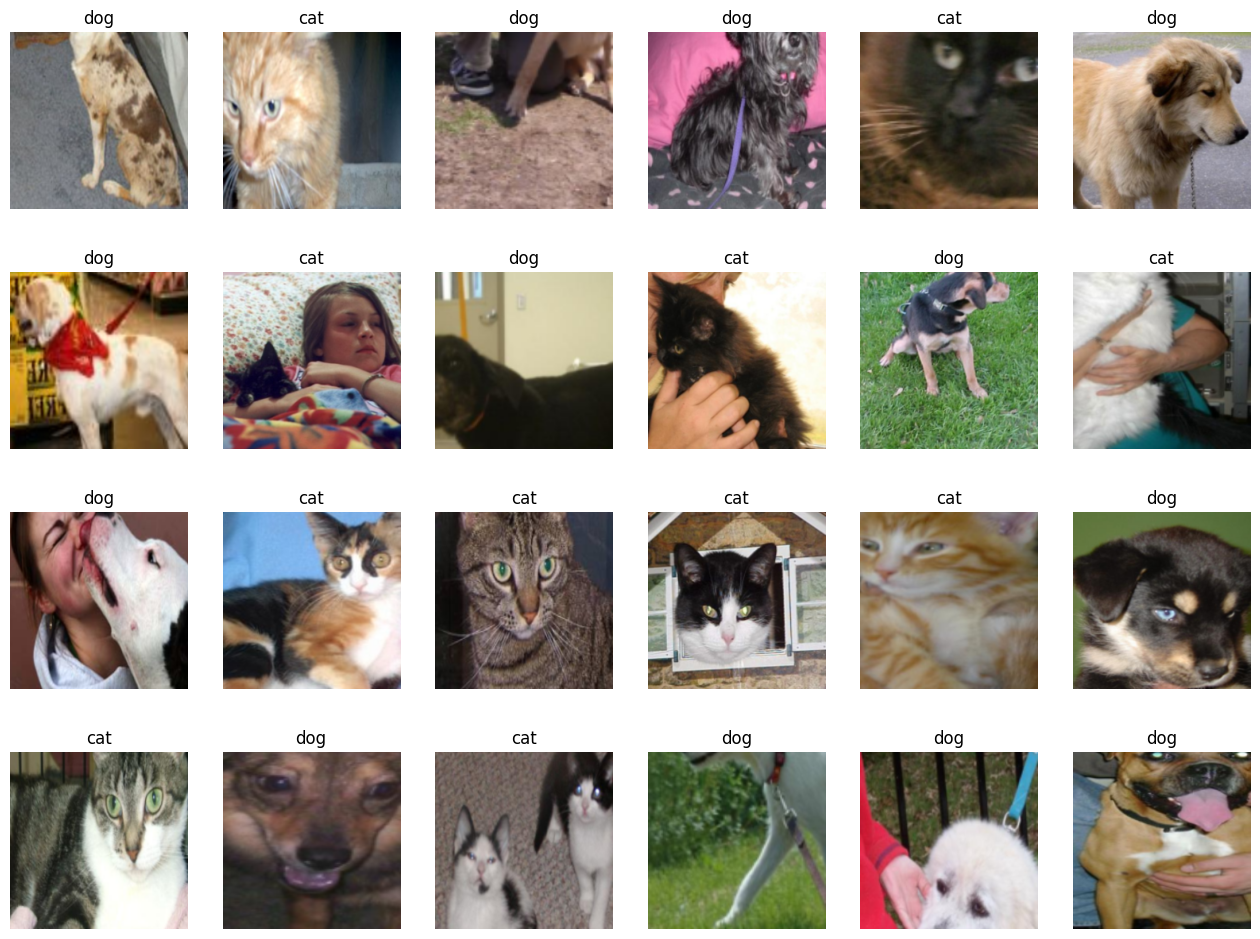

In [ ]:
# 코드 5-14 학습에 사용될 이미지 출력
import numpy as np
# 잘못된 코드
# samples, labels = iter(train_loader).next()

# 올바른 코드
samples, labels = next(iter(train_loader))

classes = {0:'cat', 1:'dog'}


fig = plt.figure(figsize=(16,24))
for i in range(24):
    a = fig.add_subplot(4,6,i+1)
    a.set_title(classes[labels[i].item()])
    a.axis('off')
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

In [ ]:
print(samples.shape)
np.transpose(samples[i].numpy(), (1,2,0)).shape

torch.Size([32, 3, 224, 224])


(224, 224, 3)

In [ ]:
exam = np.arange(24).reshape(2,3,4)
exam

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
np.transpose(exam, (2,1,0)).shape

(4, 3, 2)

In [ ]:
#코드 5-15 사전 훈련된 모델 내려받기
resnet18 = models.resnet18(pretrained=True)

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#코드 5-16 사전 훈련된 모델의 파라미터 학습 유무 지정
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False #역전파 파라미터에 대한 변화 계산 불필요
            
set_parameter_requires_grad(resnet18)

In [ ]:
# 코드 5-17 ResNet18에 완전 연결층 추가
resnet18.fc = nn.Linear(512, 2)
# ResNet18의 마지막 분류기(fc)를, 원래의 1000 클래스용 완전연결층에서 2 클래스용으로 교체하는 코드

- ResNet18은 기본적으로 **ImageNet(1000 클래스)**용 구조

  > ResNet은 여러 개의 convolution 블록 → 전역 평균 풀링(avgpool) → 완전연결층(fc)으로 끝납니다.
  
    >> 이때 fc의 입력 차원은 512이고, 출력은 ImageNet 클래스 수 1000

In [ ]:
# ResNet18 끝부분 구조
...
(avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
(fc): Linear(in_features=512, out_features=1000, bias=True)


NameError: name 'AdaptiveAvgPool2d' is not defined

In [ ]:
# 코드 5-18 모델의 파라미터 값 확인
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc.weight tensor([[ 0.0014,  0.0250, -0.0162,  ..., -0.0070, -0.0190,  0.0026],
        [-0.0012,  0.0419,  0.0208,  ..., -0.0190, -0.0110, -0.0167]])
fc.bias tensor([-0.0226,  0.0438])


In [ ]:
# 코드 5-19 모델 객체 생성 및 손실함수 정의
model = models.resnet18(pretrained = True) # 모델 객체 생성

for param in model.parameters():
    param.requires_grad = False # 모델의 합성곱층 가중치 고정

model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters():
    param.requires_grad = True # 완전 연결층 학습

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss() # 손실함수 정의
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 코드 5-20 모델 학습을 위한 함수 생성
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
    since = time.time()  # 컴퓨터의 현재 시각을 구하는 함수  
    acc_history = []
    loss_history = []
    best_acc = 0.0
    
    for epoch in range(num_epochs): #에포크(13) 만큼 반복
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders: # 데이터 로더에 전달된 데이터만큼 반복
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            model.to(device)
            optimizer.zero_grad() # 기울기를 0으로 설정
            outputs = model(inputs) # 순전파 학습
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward() # 역전파 학습
            optimizer.step() # 가중치 갱신

            running_loss += loss.item() * inputs.size(0) # 출력 결과와 레이블 오차를 계산한 결과를 누적 저장
            running_corrects += torch.sum(preds == labels.data) # 출력 결과와 레이블이 동일 여부 확인 결과 저장

        epoch_loss = running_loss / len(dataloaders.dataset) # 평균 오차 계산
        epoch_acc = running_corrects.double() / len(dataloaders.dataset) # 평균 정확도 계산

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)   
             
        # 모델 재사용 위해 저장
        torch.save(model.state_dict(), os.path.join('chap05/data/catanddog/', '{0:0=2d}.pth'.format(epoch)))
        print()

    time_elapsed = time.time() - since #실행 시간(학습 시간)계산
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))    
    return acc_history, loss_history # 모델의 정확도와 오차를 반환

In [ ]:
# 코드 5-21 파라미터 학습 결과를 옵티마이저에 전달
params_to_update = []
for name,param in resnet18.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 fc.weight
	 fc.bias


In [ ]:
#코드 5-22 모델 학습
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss() # 손실함수 지정

# 모델 훈련에 전달 파라미터: 모델, 학습 데이터, 손실함수, 옵티마이저, CPU/GPU
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.4745 Acc: 0.7896

Epoch 1/12
----------
Loss: 0.3731 Acc: 0.8675

Epoch 2/12
----------
Loss: 0.3074 Acc: 0.8935

Epoch 3/12
----------
Loss: 0.2792 Acc: 0.8779

Epoch 4/12
----------
Loss: 0.2543 Acc: 0.8961

Epoch 5/12
----------
Loss: 0.2439 Acc: 0.9169

Epoch 6/12
----------
Loss: 0.2630 Acc: 0.8909

Epoch 7/12
----------
Loss: 0.2564 Acc: 0.8987

Epoch 8/12
----------
Loss: 0.1938 Acc: 0.9299

Epoch 9/12
----------
Loss: 0.2296 Acc: 0.8883

Epoch 10/12
----------
Loss: 0.2253 Acc: 0.9117

Epoch 11/12
----------
Loss: 0.2085 Acc: 0.9065

Epoch 12/12
----------
Loss: 0.1899 Acc: 0.9325

Training complete in 2m 55s
Best Acc: 0.932468


ImageFolder는 디렉터리 구조

test/
    cat/
        img1.jpg
        img2.jpg
        ...
    dog/
        imgA.jpg
        imgB.jpg
        ...


In [ ]:
# 코드 5-23 테스트 데이터 호출 및 전처리
# 테스트 데이터셋을 불러와서 PyTorch DataLoader로 감싼다
test_path = 'chap05/data/catanddog/test'

transform = transforms.Compose([
    transforms.Resize(224),       # 짧은 변을 224로 크기 조정
    transforms.CenterCrop(224),   # 중앙을 224x224로 자름
    transforms.ToTensor(),        # [0,255] 픽셀을 [0,1] float Tensor로 변환, (C,H,W) 구조
])

test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
#ImageFolder는 root 폴더 안의 하위 폴더명을 클래스 라벨로 자동 인식
#cat/ 안의 이미지는 클래스 0, dog/ 안의 이미지는 클래스 1로 라벨링
# 이미지 불러올 때마다 위에서 정의한 transform이 적용

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)
# DataLoader는 Dataset을 감싸서 미니배치 단위로 데이터를 뽑아주는 도구
# batch_size=32: 한 번에 32개의 이미지/라벨 묶음
# shuffle=True: 배치마다 데이터를 섞어서 추출 → 학습할 때 데이터 순서로 인한 편향 방지 (테스트셋에서는 보통 False를 씀).

print(len(test_dataset))

98


In [ ]:
# 코드 5-24 테스트 데이터 평가 함수 생성
def eval_model(model, dataloaders, device):
    since = time.time()    
    acc_history = []
    best_acc = 0.0
    # glob()은 폴더에서 원하는 파일들만 가져오기 위해 사용
    saved_models = glob.glob('chap05/data/catanddog/' + '*.pth')
    saved_models.sort()
    print('saved_model', saved_models)

    for model_path in saved_models:
        print('Loading model', model_path)

        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0

        for inputs, labels in dataloaders: # 테스트 반복
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad(): #autograd()를 사용하지 않는다
                outputs = model(inputs) # 데이터를 모델에 적용한 결과를 outputs에 저장

            #_, preds = torch.max(outputs.data, 1) # 주어진 텐서 배열의 최대값이 들어 있는 인덱스 반환           
            #preds[preds >= 0.5] = 1 #torch.max로 출력된 값이 0.5보다 크면 올바른 예측
            #preds[preds < 0.5] = 0 #torch.max로 출력된 값이 0.5보다 작으면 틀리게 예측
            preds = outputs.argmax(dim=1)
            #running_corrects += preds .eq(labels.cpu()).int().sum() # preds 배열과 labels가 일치하는지를 검사
            running_corrects += (preds== labels).sum()
        epoch_acc = running_corrects / len(dataloaders.dataset) # 테스트 데이터의 정확도 계산
        print('Acc: {:.4f}'.format(epoch_acc))
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        print()

    time_elapsed = time.time() - since
    print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history

In [ ]:
# 코드 5-25 테스트 데이터를 평가 함수에 적용
val_acc_hist = eval_model(resnet18, test_loader, device)

saved_model ['chap05/data/catanddog\\00.pth', 'chap05/data/catanddog\\01.pth', 'chap05/data/catanddog\\02.pth', 'chap05/data/catanddog\\03.pth', 'chap05/data/catanddog\\04.pth', 'chap05/data/catanddog\\05.pth', 'chap05/data/catanddog\\06.pth', 'chap05/data/catanddog\\07.pth', 'chap05/data/catanddog\\08.pth', 'chap05/data/catanddog\\09.pth', 'chap05/data/catanddog\\10.pth', 'chap05/data/catanddog\\11.pth', 'chap05/data/catanddog\\12.pth']
Loading model chap05/data/catanddog\00.pth
Acc: 0.8980

Loading model chap05/data/catanddog\01.pth
Acc: 0.9490

Loading model chap05/data/catanddog\02.pth
Acc: 0.9490

Loading model chap05/data/catanddog\03.pth
Acc: 0.9490

Loading model chap05/data/catanddog\04.pth
Acc: 0.9592

Loading model chap05/data/catanddog\05.pth
Acc: 0.9490

Loading model chap05/data/catanddog\06.pth
Acc: 0.9694

Loading model chap05/data/catanddog\07.pth
Acc: 0.9592

Loading model chap05/data/catanddog\08.pth
Acc: 0.9694

Loading model chap05/data/catanddog\09.pth
Acc: 0.9592

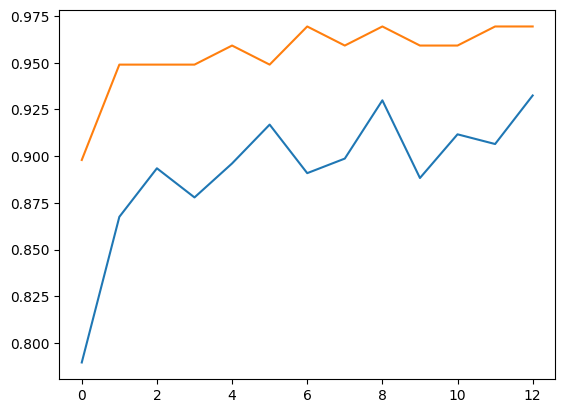

In [ ]:
# 코드5-26 훈련과 테스트 데이터의 정확도를 그래프로 확인
plt.plot(train_acc_hist) # 푸른색 - 훈련 그래프, x축은 에포크
plt.plot(val_acc_hist) #주황색 - 검증 그래프
plt.show()

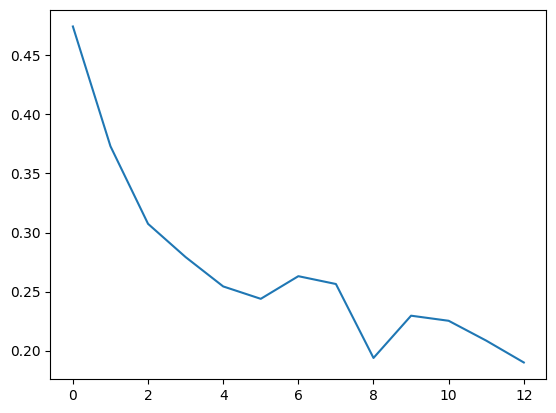

In [ ]:
# 코드 5-27 훈련 데이터의 오차에 대한 그래프
plt.plot(train_loss_hist) # 에포크 진행될 수록 오차가 낮아지고 있다
plt.show()

In [ ]:
#코드 5-28 예측 이미지 출력을 위한 전처리 함수
def im_convert(tensor):  
    image=tensor.clone().detach().numpy()  # 기존 텐서를 복사 > detach()는 기울기가 전파되지 않는 텐서
    # 224페이지 표 5-2
    image=image.transpose(1,2,0)  
    image=image*(np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5)))  
    image=image.clip(0,1)  # image 데이터를 0 ~ 1 사이로 제한
    return image  

In [ ]:
import numpy as np
exam = np.array([-1.8, -1.2, -0.7, 0.0, 1.4, 1.9])
print(exam)
print(np.clip(exam, -0.5, 0.5))

[-1.8 -1.2 -0.7  0.   1.4  1.9]
[-0.5 -0.5 -0.5  0.   0.5  0.5]


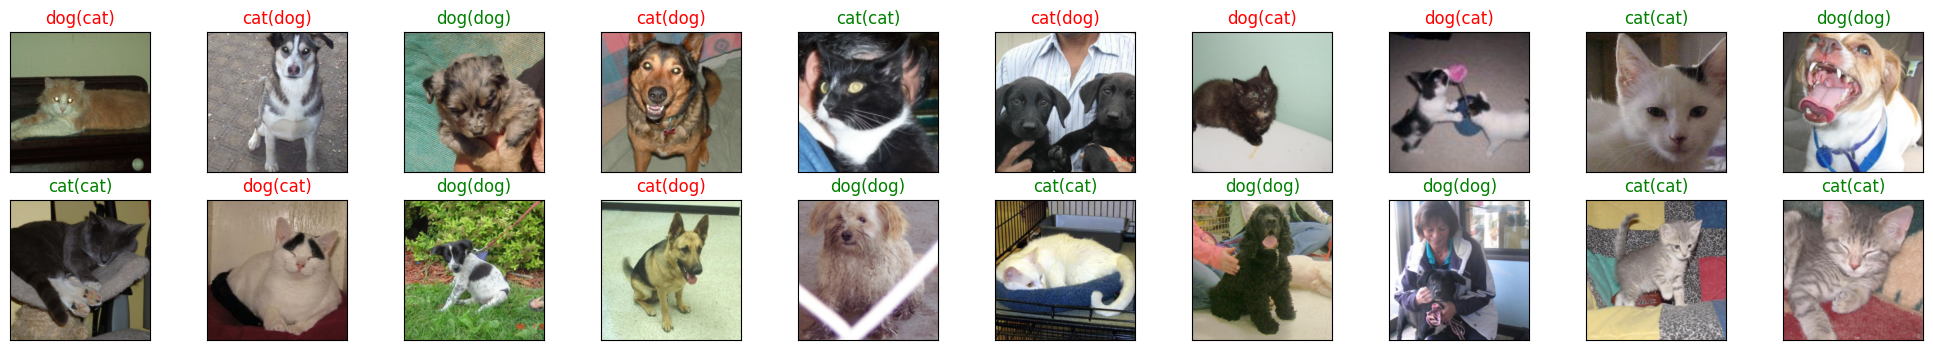

<Figure size 640x480 with 0 Axes>

In [ ]:
#코드 5-29 개와 고양이 예측 결과 출력
classes = {0:'cat', 1:'dog'}

dataiter=iter(test_loader)  # 테스트 데이터를 가져온다
#images,labels=dataiter.next()  
images,labels=next(dataiter)  #테스트 데이터에서 이미지와 레이블을 분리하여 가져 온다
output=model(images)  
_,preds=torch.max(output,1) 

fig=plt.figure(figsize=(25,4))  
for idx in np.arange(20):  
    ax=fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])  # 하나의 화면에 여러개의 이미지를 담는다
    plt.imshow(im_convert(images[idx]))  # 이미지 출력을 위해 코드 5-28의 im_convert 함수를 적용
    ax.set_title(classes[labels[idx].item()])
    ax.set_title("{}({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()])),color=("green" if preds[idx]==labels[idx] else "red"))  
plt.show()  
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)
### 빨강색은 예측이 잘 못된 것

#### 5.3.2 미세 조정 기법

- fine-tuning 기법: 사전 훈련된 모델과 합성곱층, 데이터 분류기의 가중치를 업데이트하여 훈련시키는 방식

  > 특성 추출 기법: 목표 특성을 잘 추출했다는 전제하에 좋은 성능

  > 특성이 잘 못 추출되었을 경우: 예) 전자 상거래 물품의 이미지 특징이 특성 추출과 다를 경우

    >> 새로운 (전자상거래) 이미지 데이터를 사용하여 네트워크의 가중치를 업데이트하는 것

- 미세조정기법 전략: 228페이지 하단 2가지 + 229페이지 상단 2가지 > 그림 5-44

#### 5.4 설명 가능한 CNN

- CNN 처리 과정을 시각화

  > CNN 중간 계층부터 최종 분류기까지 특성이 어떻게 추출되고 학습하는지를 시각적으로 설명

#### # 5.4.1 특성 맵 시각화

- feature map: 필터를 입력에 적용한 결과

  > 특성 맵에서 입력 특성을 감지하는 방법을 이해

- PIL( Python Image Library): 이미지 분석 및 처리를 쉽게 할 수 있도록 도와주는 라이브러리

In [ ]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [29]:
# 코드 5-30 필요한 라이브러리 호출
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.transforms import ToTensor
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [30]:
# 코드 5-31 설명 가능한 네트워크 생성
## 13개의 합성곱층 + 2개의 완전 연결층
class XAI(torch.nn.Module):
    def __init__(self, num_classes=2):
        super(XAI, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, bias=False), # 13개의 합성곱층
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(64, 64, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(128, 128, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 512, bias=False),# 2개의 완전 연결층
            nn.Dropout(0.5),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 512)
        x = self.classifier(x)
        return F.log_softmax(x) #신경망 결과 값을 확률 개념으로 해석
    # 로그 소프트맥스를 사용하는 이유: 233페이지 상단 설명과 softmax(), logsoftmax() 비교

In [31]:
# 코드 5-32 모델 객체화
model=XAI()
model.to(device)
model.eval()

XAI(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True

#### 특성 맵의 시각화

In [43]:
# 코드 5-33 특성맵을 확인하기 위한 클래스 정의
import torch
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device).eval()

class LayerActivations:
    features=[]
    def __init__(self, model, layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
        # 파이토치는 hook 기능을 사용하여 각 계층의 활성화 함수와 기울기 값 확인
        # register_forward_hook(self.hook_fn): 순전파 중에 각 네트워크 모델의 입력과 출력을 가져온다
        self.features = None
   
    def hook_fn(self, module, input, output):
        self.features = output.detach().cpu().numpy()
 
    def remove(self): 
        self.hook.remove()

In [44]:
import torch,cv2
x = torch.Tensor([0,1,2,3]).requires_grad_()
# .requires_grad_() → 이 텐서로부터 계산되는 결과에 대해 자동으로 미분을 추적하겠다는 의미
y = torch.Tensor([4,5,6,7]).requires_grad_()
w = torch.Tensor([1,2,3,4]).requires_grad_()
z = x + y
o = w.matmul(z) # 두 벡터의 내적(dot product) > o = w · (x+y)
# hook 함수 정의
def hook_fn(grad):
    print("z.grad from hook:", grad)

# hook 등록
z.register_hook(hook_fn)

o.backward() # 역전파를 할 때 x.grad, y.grad, w.grad에 기울기가 기록
print(x.grad, y.grad, z.grad, w.grad, o.grad)


z.grad from hook: tensor([1., 2., 3., 4.])
tensor([1., 2., 3., 4.]) tensor([1., 2., 3., 4.]) None tensor([ 4.,  6.,  8., 10.]) None


C:\Users\user\AppData\Local\Temp\ipykernel_6024\4153438732.py:16: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(x.grad, y.grad, z.grad, w.grad, o.grad)


∂o/∂wᵢ = xᵢ + yᵢ = zᵢ

∂o/∂xᵢ = wᵢ

∂o/∂yᵢ = wᵢ

w.grad = z = [4,6,8,10]

x.grad = w = [1,2,3,4]

y.grad = w = [1,2,3,4]

3개의 벡터(x, y, w)를 만들고

o = w · (x+y)라는 식을 정의한 뒤

o.backward()를 통해 자동으로 기울기를 계산합니다.

👉 결과적으로 x.grad와 y.grad는 w, w.grad는 (x+y)가 됩니다.

o,z는 중간값으로 파이토치는 중간 변수에 대하여 기울기 값을 저장하지 않는다


torch.Size([1, 3, 100, 100])


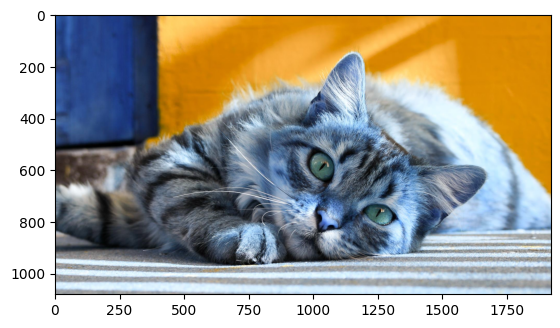

In [45]:
# 코드 5-34 이미지 호출
img=cv2.imread("chap05/data/cat.jpg")   
plt.imshow(img)
img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR) # 이미지 크기를 변경
img = ToTensor()(img).unsqueeze(0) # 이미지 > 텐서 > 차원 추가
print(img.shape)

In [46]:
import torch
x1 = torch.rand(3,10,64)
x2 = x1.unsqueeze(dim=0)
print(x2.shape)
print('----------')
x3 = x1.unsqueeze(dim=1)
print(x3.shape)

torch.Size([1, 3, 10, 64])
----------
torch.Size([3, 1, 10, 64])


In [47]:
# 코드 5-35 (0): Conv2d 특성 맵 확인
result = LayerActivations(model.features, 0) # 0번째 Conv2d 특성 맵 확인
with torch.no_grad():
    _ = model(img)                             # ★ 순전파도 동일 디바이스라 OK
acts = result.features
result.remove()
print(acts.shape)  # (1, C, H, W)
#model(img)
#activations = result.features

(1, 64, 98, 98)


C:\Users\user\AppData\Local\Temp\ipykernel_6024\1110514692.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x) #신경망 결과 값을 확률 개념으로 해석


In [48]:
# 모델과 입력 텐서가 실제 어떤 장치에 있는지 확인
print("model device :", next(model.parameters()).device)
print("img device   :", img.device)


model device : cpu
img device   : cpu


In [51]:
import torch, cv2
from torchvision.transforms import ToTensor
from torch import nn

# 1) 디바이스 정렬
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device).eval()

# 2) 이미지 전처리 (BGR->RGB, 224 리사이즈, 텐서화, 디바이스 올리기)
img_bgr = cv2.imread("chap05/data/cat.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (224, 224), interpolation=cv2.INTER_LINEAR)
img = ToTensor()(img_rgb).unsqueeze(0).to(device)  # ★ 입력도 같은 디바이스

# 3) 모델에서 첫 Conv2d 모듈을 찾아오는 유틸 (모델 구조가 ResNet이든 커스텀이든 동작)
def get_first(module: nn.Module, typ):
    for m in module.modules():
        if isinstance(m, typ):
            return m
    raise RuntimeError(f"Module of type {typ} not found")

target_module = get_first(model, nn.Conv2d)  # 첫 번째 Conv2d

# 4) 훅 클래스 (CUDA → NumPy 변환 안전)
class LayerActivations:
    def __init__(self, module: nn.Module):
        self.features = None
        self.hook = module.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, inputs, output):
        self.features = output.detach().cpu().numpy()  # ★ 반드시 cpu() 거친 후 numpy()
    def remove(self):
        self.hook.remove()

# 5) 훅 달고 순전파
result = LayerActivations(target_module)
with torch.no_grad():
    _ = model(img)   # ★ 모델·입력 모두 device 일치

acts = result.features
result.remove()

print("acts shape:", acts.shape)   # (N, C, H, W) 예상


acts shape: (1, 64, 222, 222)


C:\Users\user\AppData\Local\Temp\ipykernel_6024\1110514692.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x) #신경망 결과 값을 확률 개념으로 해석


In [52]:
# acts → activations 로 이름 바꿔서 씀
activations = acts


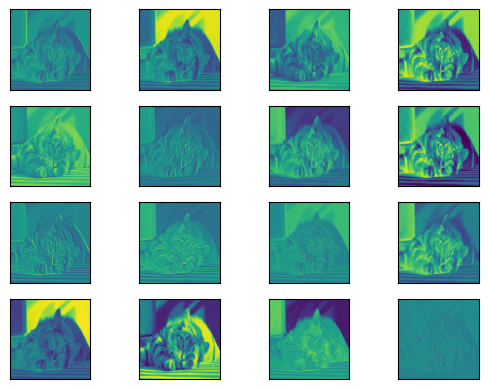

<Figure size 1200x800 with 0 Axes>

In [53]:
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

In [54]:
#result = LayerActivations(model.features, 20)
result = LayerActivations(model.features[20])


model(img)
activations = result.features

C:\Users\user\AppData\Local\Temp\ipykernel_6024\1110514692.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x) #신경망 결과 값을 확률 개념으로 해석


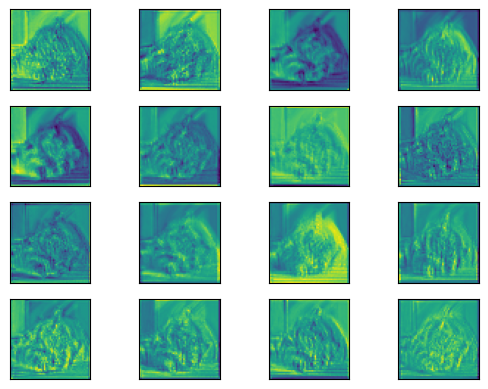

<Figure size 1200x800 with 0 Axes>

In [55]:
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

In [56]:
#result = LayerActivations(model.features, 40)
result = LayerActivations(model.features[40])

model(img)
activations = result.features

C:\Users\user\AppData\Local\Temp\ipykernel_6024\1110514692.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x) #신경망 결과 값을 확률 개념으로 해석


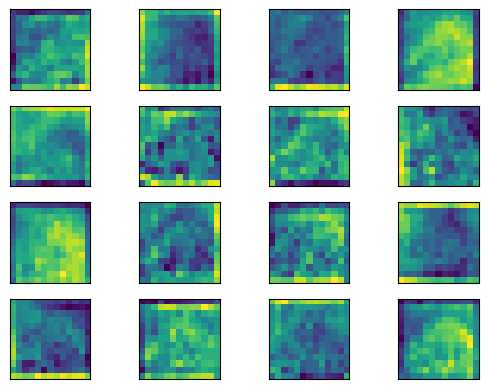

<Figure size 1200x800 with 0 Axes>

In [57]:
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

#### 5.5.3 그래프 합성곱 네트워크

- GNN (그래프 신경망), Heath_Jeong·2021년 3월 13일, https://velog.io/@dldydldy75/GNN-%EA%B7%B8%EB%9E%98%ED%94%84-%EC%8B%A0%EA%B2%BD%EB%A7%9D

기본 아이디어: 메시지 전달 (Message Passing)

그래프 = 노드(점) + 엣지(연결)

GNN은 노드가 이웃 노드들과 메시지를 주고받으며 자기 표현을 업데이트하는 구조예요.

비유 👉 학생(노드)이 있고, 친구 관계(엣지)가 있어요.

학생이 매 학기마다 친구들의 이야기를 들어서 자기 생각(표현)을 업데이트하는 겁니다.

→ 이렇게 여러 학기를 거치면, 학생의 생각은 자기 친구뿐 아니라 “친구의 친구”까지 반영하게 됩니다.

학습이란? (CNN과 비교)

CNN: 이미지를 보고 **필터(가중치)**가 좋은 특징을 뽑도록 학습.

GNN: 그래프를 보고 **메시지를 모으는 규칙(가중치)**가 좋은 특징을 뽑도록 학습.

즉, 노드/그래프의 표현 벡터가 주어진 라벨(예: 독성 여부, 친구 그룹 분류)을 잘 맞추도록
가중치 W를 업데이트하는 게 학습이에요.

학습 절차 (쉽게)

초기 노드 특징 입력 (예: 원자의 종류, 소셜네트워크에서 나이/성별 등).

합성곱(메시지 전달): 각 노드가 이웃 노드들의 특징을 평균/합산 + 변환(W 곱하기).

여러 층을 쌓기: 더 먼 이웃의 정보까지 전달.

Readout: 모든 노드 표현을 모아서 그래프 전체를 대표하는 벡터로 요약.

분류기/회귀기: 그래프 라벨 예측 (예: 독성=Yes/No).

손실함수 계산: 예측값 vs 정답 비교.

역전파 + 옵티마이저: 가중치 W를 조금씩 조정해서 오차를 줄임.

→ 이 과정이 **에포크(epoch)**마다 반복되며 모델이 점점 똑똑해지는 거예

핵심 포인트

CNN은 격자(이미지)에서 국소 영역을 합성곱

GNN은 그래프에서 이웃 노드 정보를 합성곱

학습은 결국 “이웃 정보를 어떻게 잘 모을까”라는 규칙(W)을 최적화하는 과정

쉬운 비유

학습 전: 학생들이 아무 준비 없이 수업 듣는 상태 (노드 표현 초기값).

메시지 전달: 매 수업마다 친구들끼리 토론 (이웃 정보 교환).

여러 층: 학기 반복 → 친구의 친구 얘기도 전해 들음.

Readout: 반 전체 토론 결과 요약 (그래프 표현).

손실 계산: 정답 시험지와 비교 → 성적 확인.

역전파: 틀린 이유를 분석하고 다음 학기에는 공부 방법(가중치)을 개선.

그래프 신경망 학습이란

노드가 이웃 정보로 자기 표현을 갱신하고,

그래프 전체 표현을 만든 뒤,

정답과 비교하며 가중치를 조정하는 반복 과정입니다.

In [58]:
# === 최소 GCN으로 노드 분류 (Pure PyTorch) ===
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1) 장난감 그래프 정의 -------------------------------------------------------
# 노드 0~2 = 클래스 0, 노드 3~5 = 클래스 1
labels = torch.tensor([0, 0, 0, 1, 1, 1], dtype=torch.long)

# 인접행렬 (무방향). 대각(self-loop)은 아래에서 추가할게요.
A = torch.tensor([
    [0,1,1,0,0,0],
    [1,0,1,0,0,0],
    [1,1,0,0,0,0],  # 0-1-2 서로 촘촘(같은 클래스)
    [0,0,0,0,1,1],
    [0,0,0,1,0,1],
    [0,0,0,1,1,0],  # 3-4-5 서로 촘촘(같은 클래스)
], dtype=torch.float32)

# 노드 특징 X (6x3). 간단히 degree/one-hot 등 아무거나 써도 됩니다.
# 여기서는 직관을 위해 두 커뮤니티를 약간 다르게 분포시킨 피쳐를 임의로 둡니다.
X = torch.tensor([
    [1.0, 0.5, 0.2],
    [0.9, 0.4, 0.3],
    [1.1, 0.6, 0.1],  # 클래스 0쪽 특징
    [0.1, 0.8, 1.0],
    [0.2, 0.7, 0.9],
    [0.0, 0.9, 1.1],  # 클래스 1쪽 특징
], dtype=torch.float32)

# 정규화된 인접행렬 \hat{A} = D^{-1/2} (A + I) D^{-1/2}
I = torch.eye(A.size(0))
A_hat = A + I
D_hat = torch.diag(torch.sum(A_hat, dim=1))
D_hat_inv_sqrt = torch.linalg.inv(torch.sqrt(D_hat))
A_norm = D_hat_inv_sqrt @ A_hat @ D_hat_inv_sqrt  # (6x6)

# 2) GCN 레이어/모델 ----------------------------------------------------------
class GCNLayer(nn.Module):
    def __init__(self, in_dim, out_dim, bias=True):
        super().__init__()
        self.W = nn.Linear(in_dim, out_dim, bias=bias)  # X @ W  (특징 변환)

    def forward(self, X, A_norm):
        # 메시지 전달: A_norm @ X  → 이웃 집계(자기 자신 포함)
        H = A_norm @ X
        # 특징 변환: (A_norm X) W
        return self.W(H)

class GCN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.gcn1 = GCNLayer(in_dim, hidden_dim)
        self.gcn2 = GCNLayer(hidden_dim, out_dim)

    def forward(self, X, A_norm):
        H = self.gcn1(X, A_norm)
        H = F.relu(H)
        H = self.gcn2(H, A_norm)   # 로짓(노드별 클래스 점수)
        return H

model = GCN(in_dim=3, hidden_dim=8, out_dim=2)  # 2개 클래스(고양이/개 비유)

# 3) 학습 루프 ---------------------------------------------------------------
optimizer = torch.optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, 201):
    model.train()
    optimizer.zero_grad()
    logits = model(X, A_norm)                # (6 x 2)
    loss = criterion(logits, labels)         # 모든 노드에 대해 지도학습
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        with torch.no_grad():
            preds = logits.argmax(dim=1)     # argmax로 예측
            acc = (preds == labels).float().mean().item()
            print(f"Epoch {epoch:3d} | Loss {loss.item():.4f} | Acc {acc*100:.1f}%")

# 4) 결과 확인 ---------------------------------------------------------------
with torch.no_grad():
    logits = model(X, A_norm)
    preds = logits.argmax(dim=1)
    print("\nLabels:", labels.tolist())
    print("Preds :", preds.tolist())


Epoch  20 | Loss 0.0049 | Acc 100.0%
Epoch  40 | Loss 0.0000 | Acc 100.0%
Epoch  60 | Loss 0.0000 | Acc 100.0%
Epoch  80 | Loss 0.0001 | Acc 100.0%
Epoch 100 | Loss 0.0003 | Acc 100.0%
Epoch 120 | Loss 0.0004 | Acc 100.0%
Epoch 140 | Loss 0.0005 | Acc 100.0%
Epoch 160 | Loss 0.0006 | Acc 100.0%
Epoch 180 | Loss 0.0006 | Acc 100.0%
Epoch 200 | Loss 0.0006 | Acc 100.0%

Labels: [0, 0, 0, 1, 1, 1]
Preds : [0, 0, 0, 1, 1, 1]


코드가 보여주는 것

메시지 전달(Graph Convolution): A_norm @ X 로 이웃 정보를 모읍니다.

특징 변환(학습 파라미터): (A_norm X) @ W 로 가중치 W를 학습합니다.

여러 층: 2층 GCN → 친구의 친구 정보까지 스며듭니다.

손실/역전파: CrossEntropyLoss + Adam으로 가중치를 갱신합니다.

정확도: 간단 그래프라 몇십 에폭 지나면 거의 100%에 가까워집니다.